## Mohammad javad Taghavi


## Start

### everything we need in this lab 

In [1]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\javad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\javad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Section 1

In [2]:
df_train = pd.read_csv('twitter_training.csv', header=None, names=['ID', 'Source', 'Sentiment', 'Tweet'])
df_test = pd.read_csv('twitter_validation.csv', header=None, names=['ID', 'Source', 'Sentiment', 'Tweet'])



df_train['Tweet'].fillna('', inplace=True)
df_test['Tweet'].fillna('', inplace=True)

In [3]:
df_train

,ID,Source,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df_test

,ID,Source,Sentiment,Tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


### Section 2

In [5]:
def preprocess_text(text):

    text = text.lower()

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word.isalpha()]

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
      
    return ' '.join(tokens)

In [6]:
df_train['ProcessedTweet'] = df_train['Tweet'].apply(preprocess_text)
df_test['ProcessedTweet'] = df_test['Tweet'].apply(preprocess_text)


In [7]:
df_train

,ID,Source,Sentiment,Tweet,ProcessedTweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized window partition mac like year behind...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition year behind nvid...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized window partition mac year behind nvid...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized window partition mac like year behind...


In [8]:
df_test

,ID,Source,Sentiment,Tweet,ProcessedTweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezos reject claim co...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word function poorly samsungus c...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping american face really commit...
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto art culture capital canada wonder want...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewer one people...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small win


### this 2 cells is for measuring length of dataset because of section 3

In [9]:
train_tweet_lengths = df_train['ProcessedTweet'].apply(lambda x: len(x.split()))
max_tweet_length_train = max(train_tweet_lengths)
average_tweet_length_train = int(sum(train_tweet_lengths) / len(train_tweet_lengths))

max_words_train = len(set(' '.join(df_train['ProcessedTweet']).split()))

print("Training Data Analysis:")
print(f"Maximum tweet length: {max_tweet_length_train}")
print(f"Average tweet length: {average_tweet_length_train}")
print(f"Vocabulary size: {max_words_train}")


Training Data Analysis:
Maximum tweet length: 163
Average tweet length: 9
Vocabulary size: 23459


In [10]:
test_tweet_lengths = df_test['ProcessedTweet'].apply(lambda x: len(x.split()))
max_tweet_length_test = max(test_tweet_lengths)
average_tweet_length_test = int(sum(test_tweet_lengths) / len(test_tweet_lengths))

max_words_test = len(set(' '.join(df_test['ProcessedTweet']).split()))

print("\nTesting Data Analysis:")
print(f"Maximum tweet length: {max_tweet_length_test}")
print(f"Average tweet length: {average_tweet_length_test}")
print(f"Vocabulary size: {max_words_test}")



Testing Data Analysis:
Maximum tweet length: 35
Average tweet length: 11
Vocabulary size: 4071


### Section 3

In [11]:
valid_labels = ['Positive', 'Negative', 'Neutral']
df_train_filtered = df_train[df_train['Sentiment'].isin(valid_labels)]
df_test_filtered = df_test[df_test['Sentiment'].isin(valid_labels)]

X_train, y_train = df_train_filtered['ProcessedTweet'], df_train_filtered['Sentiment']
X_test, y_test = df_test_filtered['ProcessedTweet'], df_test_filtered['Sentiment']


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_encoded_reshaped = y_train_encoded.reshape(-1, 1)
y_test_encoded_reshaped = y_test_encoded.reshape(-1, 1)

onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded_reshaped)
y_test_onehot = onehot_encoder.transform(y_test_encoded_reshaped)



# in 2 previuos cells we figure maxwords is : 23459 and maxlen is : 35 that is why i have chosed max words and max len 

max_words = 25000  
max_len = 40  

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

print("Number of unique words in the tokenizer:", len(tokenizer.word_index))
print("Shape of X_train_seq:", X_train_seq.shape)
print("Shape of X_test_seq:", X_test_seq.shape)
print("Shape of y_train_onehot:", y_train_onehot.shape)
print("Shape of y_test_onehot:", y_test_onehot.shape)

C:\Users\javad\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Number of unique words in the tokenizer: 20344
Shape of X_train_seq: (61692, 40)
Shape of X_test_seq: (828, 40)
Shape of y_train_onehot: (61692, 3)
Shape of y_test_onehot: (828, 3)


### Section 4

In [12]:

embedding_dim = 50 

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(16))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 50)            1250000   
                                                                 
 lstm (LSTM)                 (None, 16)                4288      
                                                                 
 dense (Dense)               (None, 3)                 51        
                                                                 
Total params: 1,254,339
Trainable params: 1,254,339
Non-trainable params: 0
_________________________________________________________________


### Section 5

Epoch 1/20
964/964 [==============================] - 31s 22ms/step - loss: 0.6706 - accuracy: 0.7143 - val_loss: 0.3046 - val_accuracy: 0.8986
Epoch 2/20
964/964 [==============================] - 20s 20ms/step - loss: 0.3576 - accuracy: 0.8603 - val_loss: 0.2013 - val_accuracy: 0.9336
Epoch 3/20
964/964 [==============================] - 20s 20ms/step - loss: 0.2551 - accuracy: 0.8974 - val_loss: 0.1768 - val_accuracy: 0.9481
Epoch 4/20
964/964 [==============================] - 19s 20ms/step - loss: 0.2067 - accuracy: 0.9160 - val_loss: 0.1525 - val_accuracy: 0.9577
Epoch 5/20
964/964 [==============================] - 20s 20ms/step - loss: 0.1790 - accuracy: 0.9255 - val_loss: 0.1508 - val_accuracy: 0.9565
Epoch 6/20
964/964 [==============================] - 19s 20ms/step - loss: 0.1574 - accuracy: 0.9334 - val_loss: 0.1475 - val_accuracy: 0.9614
Epoch 7/20
964/964 [==============================] - 20s 20ms/step - loss: 0.1429 - accuracy: 0.9379 - val_loss: 0.1542 - val_accuracy:

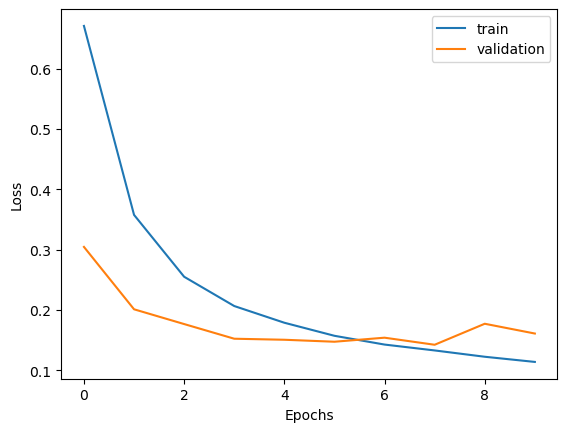

Accuracy: 0.9674
Precision: 0.9674
Recall: 0.9674
F1-Score: 0.9674


In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train_seq, y_train_onehot, validation_data=(X_test_seq, y_test_onehot), epochs=20, batch_size=64, callbacks=[early_stopping])

y_pred_onehot = model.predict(X_test_seq)
y_pred_labels = label_encoder.inverse_transform([np.argmax(pred) for pred in y_pred_onehot])

accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

### section 6

In [14]:
test_sentence = "Oppenheimer was bad but had some advantages too"

processed_test_sentence = preprocess_text(test_sentence)

test_sequence = pad_sequences(tokenizer.texts_to_sequences([processed_test_sentence]), maxlen=max_len)

prediction = model.predict(test_sequence)

predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

print(f"Predicted Sentiment: {predicted_label[0]}")


1/1 [==============================] - 0s 47ms/step
Predicted Sentiment: Neutral


### Some test

In [15]:
test_sentence = "The service at the restaurant was very bad i hate them."


processed_test_sentence = preprocess_text(test_sentence)

test_sequence = pad_sequences(tokenizer.texts_to_sequences([processed_test_sentence]), maxlen=max_len)

prediction = model.predict(test_sequence)

predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

print(f"Predicted Sentiment: {predicted_label[0]}")


1/1 [==============================] - 0s 28ms/step
Predicted Sentiment: Negative


In [16]:
test_sentence = "im so happy today is my birthday."


processed_test_sentence = preprocess_text(test_sentence)

test_sequence = pad_sequences(tokenizer.texts_to_sequences([processed_test_sentence]), maxlen=max_len)

prediction = model.predict(test_sequence)

predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

print(f"Predicted Sentiment: {predicted_label[0]}")


1/1 [==============================] - 0s 49ms/step
Predicted Sentiment: Positive


In [17]:
test_sentence = "hello my name is Mohammad javad taqavi and i love to learn NLP."


processed_test_sentence = preprocess_text(test_sentence)

test_sequence = pad_sequences(tokenizer.texts_to_sequences([processed_test_sentence]), maxlen=max_len)

prediction = model.predict(test_sequence)

predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

print(f"Predicted Sentiment: {predicted_label[0]}")


1/1 [==============================] - 0s 84ms/step
Predicted Sentiment: Positive


### End